### GW tutorial 2: Detector noise and GW150914

Author: Melissa Lopez

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [ ]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [ ]:
m = Merger('GW150914')
ifo = 'L1'
data = m.strain(ifo)

**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

In [ ]:
# Get the values from the data
duration = data.duration
sampleRate = data.sample_rate
NumberDataPoints = len(data)
FrequencyResolution = 1/duration
TimeResolution = 1/sampleRate

# Print the data values
print(f"Duration: {duration} seconds")
print(f"Sampling Rate: {sampleRate} Hz")
print(f"Number of Data Points: {NumberDataPoints}")
print(f"delta_f (Frequency Resolution): {FrequencyResolution} Hz")
print(f"delta_t (Time Resolution): {TimeResolution} seconds")

Duration: 32.0 seconds
Sampling Rate: 4096.0 Hz
Number of Data Points: 131072
Δf (Frequency Resolution): 0.03125 Hz
Δt (Time Resolution): 0.000244140625 seconds


_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

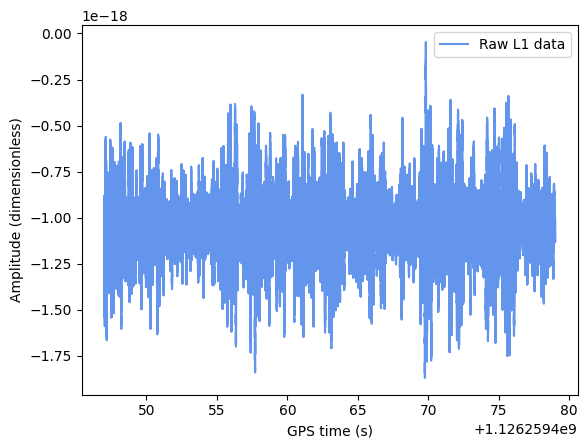

In [ ]:
# Plot the data amplitude against time
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

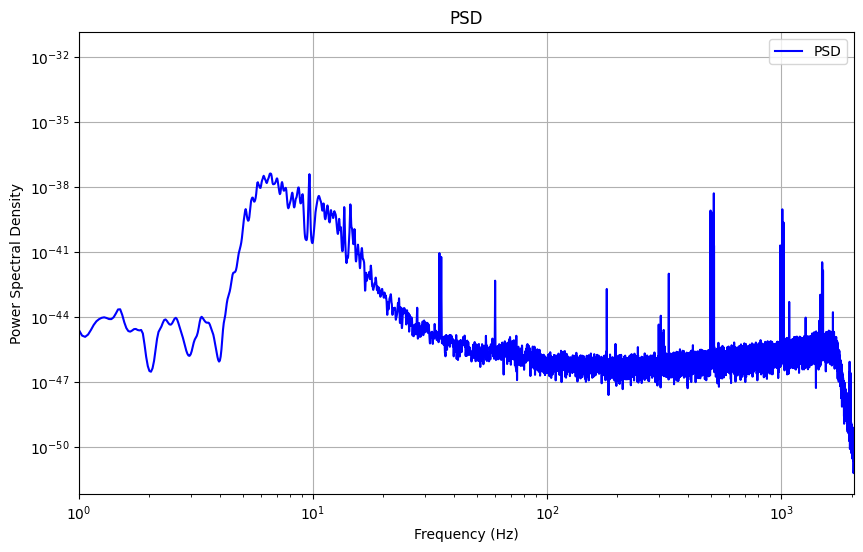

In [82]:
# Set the flow to 1
flow = 1

# Create the PSD data
psd = data.filter_psd(duration, FrequencyResolution, flow)

# Get the frequencies and psd values
frequencies = psd.sample_frequencies
psd_values = psd

# Set the fmin to 1 and the Nyquist frequency to the sample rate/2
fmin = 1
fnyq = data.sample_rate / 2

# Plot the PSD against the frequency
plt.figure(figsize=(10, 6))
plt.loglog(frequencies, psd_values, label='PSD', color='blue')
plt.xlim(fmin, fnyq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD')
plt.grid()
plt.legend()
plt.show()

The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


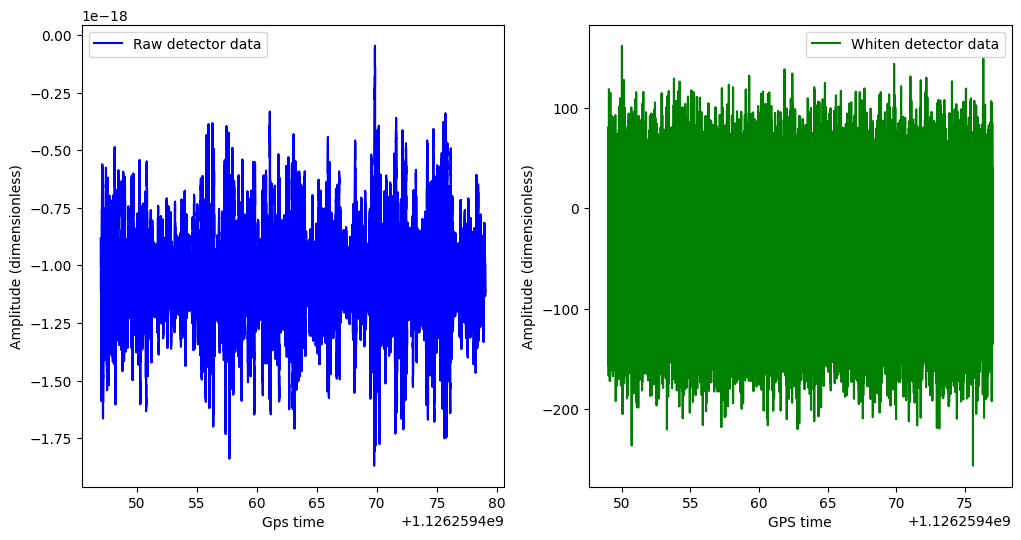

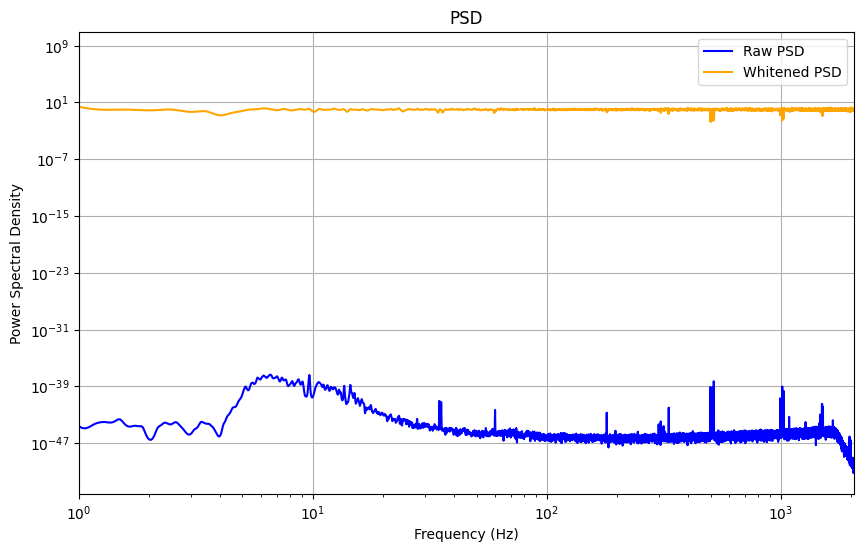

In [83]:
# Set the segmen duration and max filter duration to 4
segmentDuration = 4
maxFilterDuration = 4

# Whiten the data
Whitened_data = data.whiten(segmentDuration, maxFilterDuration)

# Get the values for the original PSD and its frequencies
frequenciesPSD = psd.sample_frequencies
psd_values = psd

# GEt the psd and frequencies values after whitening the data
psdWhitened = Whitened_data.filter_psd(segmentDuration, FrequencyResolution, flow)
frequenciesWhitened = psdWhitened.sample_frequencies

# Plot the original ampitude data against time
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(data.sample_times, data, label="Raw detector data", color="blue")
plt.xlabel("Gps time")
plt.ylabel("Amplitude (dimensionless)")
plt.legend()

# Plot the whitened amplitude date againt time
plt.subplot(1,2,2)
plt.plot(Whitened_data.sample_times, Whitened_data, label="Whiten detector data", color = "green")
plt.legend()
plt.xlabel("GPS time")
plt.ylabel("Amplitude (dimensionless)")
plt.show

# Plot the PSD of the original and whitened data against the frequency
plt.figure(figsize=(10, 6))
plt.loglog(frequenciesPSD, psd_values, label='Raw PSD', color='blue')
plt.loglog(frequenciesWhitened, psdWhitened, label='Whitened PSD', color='orange')
plt.xlim(fmin, fnyq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD')
plt.grid()
plt.legend()
plt.show()

Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

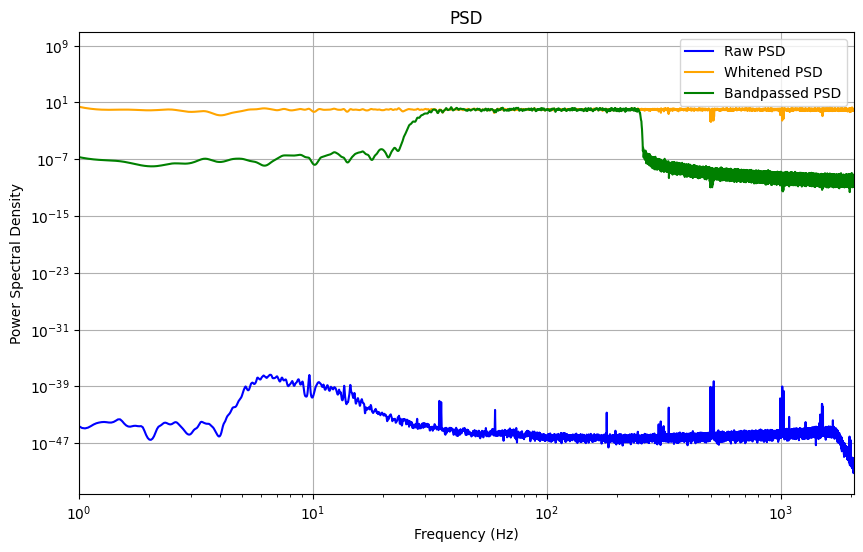

<function matplotlib.pyplot.show(close=None, block=None)>

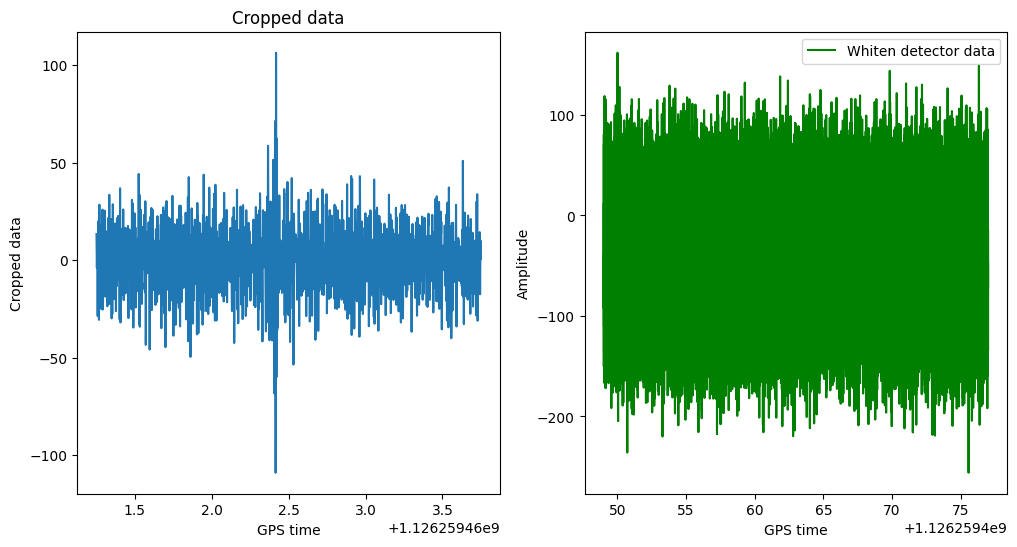

In [84]:
# Set the low cutoff to 250 and the high cutoff to 30 and the order to 512
low_cutoff = 250
high_cutoff = 30
order = 512

# Pass the whitened data through the low pass filter
lowpass_data  = Whitened_data.lowpass_fir(low_cutoff, order)

# Pass the whitened and low pass filter data through the high pass filter
bandpassed_data = lowpass_data.highpass_fir(high_cutoff, order)

# Get the PSD values for the bandpassed data
bandpassed_psd = bandpassed_data.filter_psd(segmentDuration, FrequencyResolution, flow)

# Cropp the bandpassed data
cropped_data = bandpassed_data.crop(12,13)

# Plot the PSD values of the original, whitened and bandpassed data against frequency
plt.figure(figsize=(10, 6))
plt.loglog(frequenciesPSD, psd_values, label='Raw PSD', color='blue')
plt.loglog(frequenciesWhitened, psdWhitened, label='Whitened PSD', color='orange')
plt.loglog(bandpassed_psd.sample_frequencies, bandpassed_psd, label='Bandpassed PSD', color='green')
plt.xlim(fmin, fnyq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD')
plt.grid()
plt.legend()
plt.show()

# Plot the cropped data against time
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(cropped_data.sample_times, cropped_data)
plt.xlabel("GPS time")
plt.ylabel("Cropped data")
plt.title("Cropped data")

# Plot the whitened amplitude data against time
plt.subplot(1,2,2)
plt.plot(Whitened_data.sample_times, Whitened_data, label="Whiten detector data", color = "green")
plt.legend()
plt.xlabel("GPS time")
plt.ylabel("Amplitude")
plt.show


**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

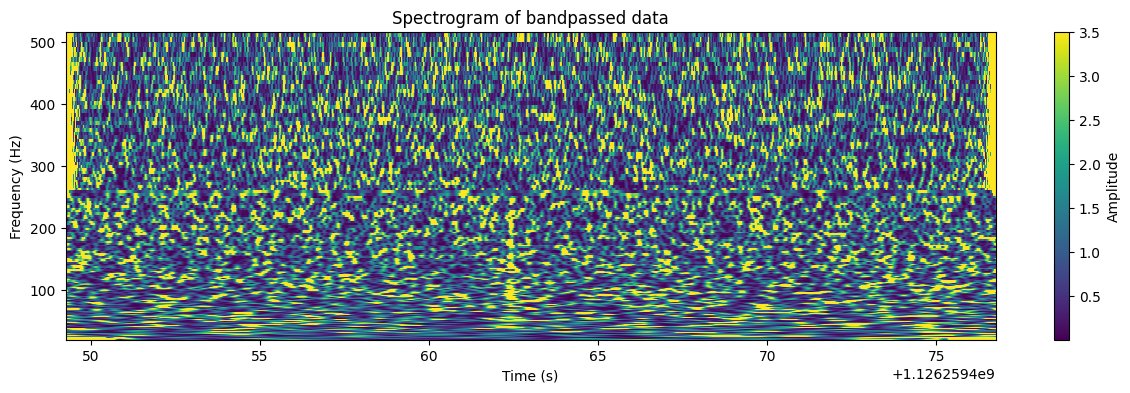

In [63]:
# Inspired from my friend Merovee

# Set the logfsteps, qrange, frange and vmax to the standard values
logfsteps = 200
qrange = (110, 110)
frange=(20, 512)
vmax = 3.5

# Get the values from the qtransform function using the bandpassed data
times, freqs, q_transform_result = bandpassed_data.qtransform(logfsteps=logfsteps, qrange=qrange, frange=frange)

# Plot the data inyo a spectogram
# The plotting is inspired by ChatGPT
plt.figure(figsize =(15,4))
plt.pcolormesh(times, freqs, q_transform_result, vmax=vmax)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of bandpassed data")
plt.colorbar(label="Amplitude")
plt.show()


As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


Good job! This is the end of the second part. Maybe you can go for a break?

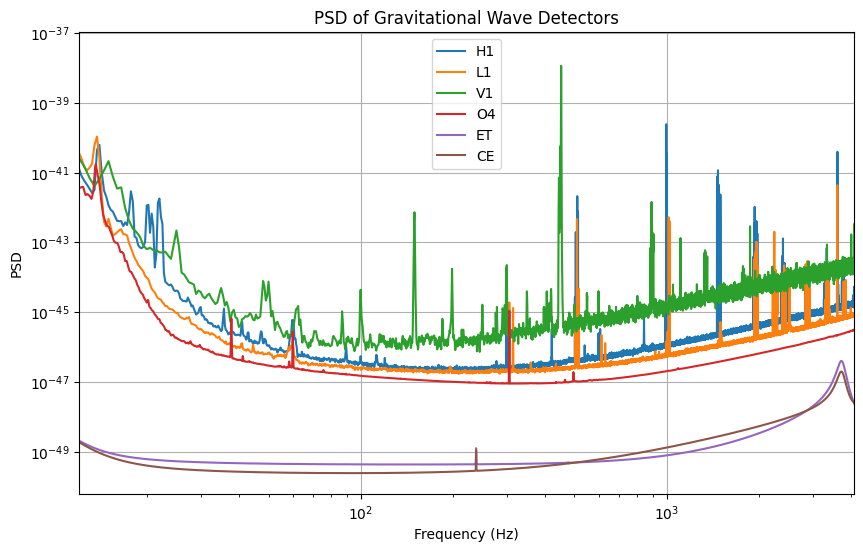

In [86]:
from pycbc.psd import read

# Function for reading the text files for the data
# This function is inspired by ChatGPT
def load_psd(filename, length, delta_f, low_freq_cutoff):
    return read.from_txt(filename, length=length, delta_f=delta_f, low_freq_cutoff=low_freq_cutoff)

# State the file names
files = {
    'H1': 'aligo_O3actual_H1.txt',
    'L1': 'aligo_O3actual_L1.txt',
    'V1': 'avirgo_O3actual.txt',
    'O4': 'aligo_O4high.txt',
}

# Set the duration to 16
duration = 16
# delta_f is equal to 1/duration
delta_f = 1/duration

# Set the sample rate to 8192
sampleRate = 8192
# Length is sample rate times duration
length = sampleRate * duration

# Set the low frequency to 12
low_frequency = 12

# Loop for reading all the files and extracting the data
# Loop is inspired by ChatGPT
psd_data = {}
for key, filename in files.items():
    psd_data[key] = load_psd(filename, length, delta_f, low_frequency)

# get the PSD values from the ET and CE function
psd_ET = pycbc.psd.analytical.CosmicExplorerWidebandP1600143(length, delta_f, low_frequency)
psd_CE = pycbc.psd.analytical.CosmicExplorerP1600143(length, delta_f, low_frequency)


plt.figure(figsize=(10, 6))

# Loop for plotting the data from the inputfiles
for key, psd in psd_data.items():
    plt.loglog(psd.sample_frequencies, psd, label=key)

# Plot the data from the ET and CE
plt.loglog(psd_ET.sample_frequencies, psd_ET, label = "ET")
plt.loglog(psd_CE.sample_frequencies, psd_CE, label = "CE")
plt.title('PSD of Gravitational Wave Detectors')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.xlim(low_frequency, sampleRate/2)
plt.grid()
plt.legend()
plt.show()